# Applied Machine Learning 

## Homework 4: Logistic regression, hyperparameter optimization 



## Imports 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

<br><br><br><br>

## Exercise 1: Implementing `DummyClassifier` 
<hr>
rubric={points:25}

In this course (unlike CPSC 340) you will generally **not** be asked to implement machine learning algorihtms (like logistic regression) from scratch. However, this exercise is an exception: you will implement the simplest possible classifier, `DummyClassifier`.

As a reminder, `DummyClassifier` is meant as a baseline and is generally the worst possible "model" you could "fit" to a dataset. All it does is predict the most popular class in the training set. So if there are more 0s than 1s it predicts 0 every time, and if there are more 1s than 0s it predicts 1 every time. For `predict_proba` it looks at the frequencies in the training set, so if you have 30% 0's 70% 1's it predicts `[0.3 0.7]` every time. Thus, `fit` only looks at `y` (not `X`).

Below you will find starter code for a class called `MyDummyClassifier`, which has methods `fit()`, `predict()`, `predict_proba()` and `score()`. Your task is to fill in those four functions. To get your started, I have given you a `return` statement in each case that returns the correct data type: `fit` can return nothing, `predict` returns an array whose size is the number of examples, `predict_proba` returns an array whose size is the number of examples x 2, and `score` returns a number.

The next code block has some tests you can use to assess whether your code is working. 

I suggest starting with `fit` and `predict`, and making sure those are working before moving on to `predict_proba`. For `predict_proba`, you should return the frequency of each class in the training data, which is the behaviour of `DummyClassifier(strategy='prior')`. Your `score` function should call your `predict` function. Again, you can compare with `DummyClassifier` using the code below.

To simplify this question, you can assume **binary classification**, and furthermore that these classes are **encoded as 0 and 1**. In other words, you can assume that `y` contains only 0s and 1s. The real `DummyClassifier` works when you have more than two classes, and also works if the target values are encoded differently, for example as "cat", "dog", "mouse", etc.

In [2]:
# class MyDummyClassifier:
#     """
#     A baseline classifier that predicts the most common class.
#     The predicted probabilities come from the relative frequencies
#     of the classes in the training data.

#     This implementation only works when y only contains 0s and 1s.
#     """
#     train_result = None
#     proba_result = [0,0]
#     classes=[]

#     def fit(self, X, y):
    
#         ys = pd.Series(y)
        
#         max_val = ys.value_counts().max()
# #         self.train_result = ys.value_counts().argmax()
#         self.train_result = (ys.value_counts() == max_val).index[0]
        
#         self.classes = np.sort(ys.unique())
        
#         self.proba_result = ys.value_counts(normalize=True)
#         return None  # Replace with your code

#     def predict(self, X):
#         result = np.full((X.shape[0],),self.train_result).copy()
#         return np.array(result.tolist()) # Replace with your code

#     def predict_proba(self, X):
#         result = np.full((X.shape[0],2),self.proba_result).copy()
#         return np.array(result.tolist())# Replace with your code

#     def score(self, X, y):
#         sy = pd.Series(y)
#         s_Y = pd.Series(self.predict(X))
#         correct_pred = ( s_Y == sy ).sum()
#         total = X.shape[0]
#         return correct_pred / total  # Replace with your code    
        


In [3]:
class MyDummyClassifier:
        """
    A baseline classifier that predicts the most common class.
    The predicted probabilities come from the relative frequencies
    of the classes in the training data.

    This implementation only works when y only contains 0s and 1s.
    """
        def __init__(self,strategy='prior'):
            self.classes_ = None
            self.class_prior_ = None

        def fit(self, X, y):
            self.classes_, counts = np.unique(y, return_counts=True)
            self.final_class = self.classes_[counts.argmax()]
            self.class_prior_ = counts / len(y)

        def predict(self, X):
            return np.full(X.shape[0],self.final_class)

        def predict_proba(self, X):
            return np.full((X.shape[0],2),self.class_prior_)

        def score(self, X, y):
            return (y == self.predict(X)).sum() / X.shape[0]


Below are some tests for `predict` using randomly generated data. You may want to run the cell a few times to make sure you explore the different cases (or automate this with a loop or random seeds).

In [4]:
# For testing, generate random data
n_train = 101
n_valid = 21
d = 5
X_train_dummy = np.random.randn(n_train, d)
X_valid_dummy = np.random.randn(n_valid, d)
y_train_dummy = np.random.randint(2, size=n_train)
y_valid_dummy = np.random.randint(2, size=n_valid)

my_dc = MyDummyClassifier()
sk_dc = DummyClassifier(strategy="prior")

my_dc.fit(X_train_dummy, y_train_dummy)
sk_dc.fit(X_train_dummy, y_train_dummy)

assert np.array_equal(my_dc.predict(X_train_dummy), sk_dc.predict(X_train_dummy))
assert np.array_equal(my_dc.predict(X_valid_dummy), sk_dc.predict(X_valid_dummy))

In [5]:
assert np.allclose(
    my_dc.predict_proba(X_train_dummy), sk_dc.predict_proba(X_train_dummy)
)
assert np.allclose(
    my_dc.predict_proba(X_valid_dummy), sk_dc.predict_proba(X_valid_dummy)
)

In [6]:
my_dc.predict_proba(X_train_dummy)

array([[0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.62376238, 0.37623762],
       [0.

Below are some tests for `score`.

In [7]:
assert np.isclose(
    my_dc.score(X_train_dummy, y_train_dummy), sk_dc.score(X_train_dummy, y_train_dummy)
)
assert np.isclose(
    my_dc.score(X_valid_dummy, y_valid_dummy), sk_dc.score(X_valid_dummy, y_valid_dummy)
)

<br><br><br><br>

## Exercise 2: Trump Tweets
<hr>

For the rest of this assignment we'll be looking at a [dataset of Donald Trump's tweets](https://www.kaggle.com/austinreese/trump-tweets) as of June 2020. You should start by downloading the dataset. Unzip it and move the file `realdonaldtrump.csv` into this directory. As usual, please do not submit the dataset when you submit the assignment. 

In [8]:
#load dataset
tweets_df = pd.read_csv("realdonaldtrump.csv")
tweets_df

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN
...,...,...,...,...,...,...,...,...
43347,1273405198698975232,https://twitter.com/realDonaldTrump/status/127...,Joe Biden was a TOTAL FAILURE in Government. H...,2020-06-17 19:00:32,23402,116377,NaN,NaN
43348,1273408026968457216,https://twitter.com/realDonaldTrump/status/127...,Will be interviewed on @ seanhannity tonight a...,2020-06-17 19:11:47,11810,56659,@seanhannity,NaN
43349,1273442195161387008,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/3lm1spbU8X,2020-06-17 21:27:33,4959,19344,NaN,NaN
43350,1273442469066276864,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/vpCE5MadUz,2020-06-17 21:28:38,4627,17022,NaN,NaN


In [9]:
tweets_df.shape

(43352, 8)

We will be trying to predict whether a tweet will go "viral", defined as having more than 10,000 retweets:

In [10]:
#find a viral tweet in dataset
y = tweets_df["retweets"] > 10_000


To make predictions, we'll be using only the content (text) of the tweet. 

In [11]:
X = tweets_df["content"]


In [12]:
new_df=pd.DataFrame(X,y)
new_df

,content
retweets,
False,NaN
False,NaN
False,NaN
False,NaN
False,NaN
...,...
True,NaN
True,NaN
False,NaN


For the purpose of this assignment, you can ignore all the other columns in the original dataset.

#### 2(a) ordering the steps
rubric={points:8}

Let's start by building a model using `CountVectorizer` and `LogisticRegression`. The code required to do this has been provided below, but in the wrong order. 

- Rearrange the lines of code to correctly fit the model and compute the cross-validation score. 
- Add a short comment to each block to describe what the code is doing.

In [13]:
# Splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=321)


# Creating CountVectorizer object with English stop words.
countvec = CountVectorizer(stop_words="english")




# Creating LogisticRegression object with maximum iteration of 1000.
lr = LogisticRegression(max_iter=1000)




#Creating a pipeline with CountVectorizer and LogisticRegression objects 
pipe = make_pipeline(countvec,lr)


# Performing cross-validation with pipeline on training set and returning train scores
cross_val_results = pd.DataFrame(
    cross_validate(pipe, X_train, y_train, return_train_score=True)
)


#Printing the mean of the cross-validation results
cross_val_results.mean()

fit_time       1.503239
score_time     0.130071
test_score     0.897890
train_score    0.967045
dtype: float64

<br><br>

#### 2(b) Cross-validation fold sub-scores
rubric={points:5}

Above we averaged the scores from the 5 folds of cross-validation. 

- Print out the 5 individual scores. Reminder: `sklearn` calls them `"test_score"` but they are really (cross-)validation scores. 
- Are the 5 scores close to each other or spread far apart? (This is a bit subjective, answer to the best of your ability.)
- How does the size of this dataset (number of rows) compare to the cities dataset we have been using in class? How does this relate to the different sub-scores from the 5 folds?

In [14]:
from sklearn.model_selection import cross_val_score
#*Print out the 5 individual scores. Reminder: sklearn calls them "test_score" but they are really (cross-)validation scores.
cross_val_results = pd.DataFrame(cross_validate(pipe,X_train,y_train,cv=10,return_train_score=True))

cross_val_results["difference"] = cross_val_results.train_score - cross_val_results.test_score
cross_val_results.sort_values(by='difference')

,fit_time,score_time,test_score,train_score,difference
0,2.758255,0.088067,0.901907,0.963946,0.062040
3,2.664226,0.111925,0.903444,0.966817,0.063373
6,2.624606,0.096009,0.900338,0.964187,0.063848
9,2.696433,0.096002,0.899723,0.966135,0.066412
5,2.688730,0.104938,0.898185,0.964973,0.066788
1,2.786381,0.111928,0.897909,0.964903,0.066994
2,2.800360,0.103996,0.898216,0.965416,0.067199
8,2.477668,0.103931,0.896955,0.964699,0.067745
7,2.655940,0.096061,0.897262,0.967057,0.069795
4,2.651317,0.096351,0.896647,0.966545,0.069898


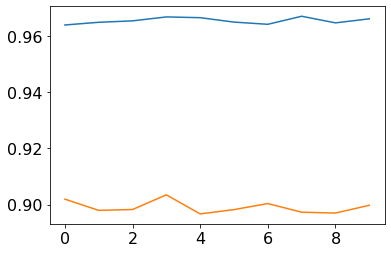

In [15]:
#*
plt.plot(cross_val_results.index,'train_score',data=cross_val_results,label='train score')
plt.plot(cross_val_results.index,'test_score',data=cross_val_results,label='test score')

In [16]:
cross_val_results.index

RangeIndex(start=0, stop=10, step=1)

<br><br>

#### 2(c) baseline
rubric={points:3}

By the way, are these scores any good? 

- Run `DummyClassifier` (or `MyDummyClassifier`!) on this dataset.
- Compare the `DummyClassifier` score to what you got from logistic regression above. Does logistic regression seem to be doing anything useful?
- Is it necessary to use `CountVectorizer` here? Briefly explain.

In [17]:
#*Run DummyClassifier (or MyDummyClassifier!) on this dataset.
#*Compare the DummyClassifier score to what you got from logistic regression above. 
#Does logistic regression seem to be doing anything useful?

dummy_model = MyDummyClassifier(strategy='prior')

dummy_model.fit(X_train,y_train)

dummy_model.score(X_train,y_train)

0.7385433966906564

In [18]:
# *Is it necessary to use CountVectorizer here? Briefly explain.
#not need to CountVectorizer found here:
#beacuse we are using Dumy classifire so that it doesn't required numerical inputs

<br><br>

#### 2(d) probability scores
rubric={points:5}

Here we train a logistic regression classifier on the entire training set: 

(Note: this is relying on the `pipe` variable from 2(a) - you'll need to redefine it if you overwrote that variable in between.)

In [19]:
pipe.fit(X_train, y_train);

In [20]:
pipe.score

<bound method Pipeline.score of Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('logisticregression', LogisticRegression(max_iter=1000))])>

Using this model, find the tweet in the **test set** with the highest predicted probability of being viral. Print out the tweet and the associated probability score.

Reminder: you are free to reuse/adapt code from lecture. Please add in a small attribution, e.g. "From Lecture 7".

In [21]:
pred_prob_test_ofViral = pipe.predict_proba(X_test)[:,1]

index_max_prob = np.argmax(pred_prob_test_ofViral)

X_test.iloc[index_max_prob]

'Corrupt politician Adam Schiff wants people from the White House to testify in his and Pelosi’s disgraceful Witch Hunt, yet he will not allow a White House lawyer, nor will he allow ANY of our requested witnesses. This is a first in due process and Congressional history!'

In [22]:
X_test.iloc[index_max_prob]

'Corrupt politician Adam Schiff wants people from the White House to testify in his and Pelosi’s disgraceful Witch Hunt, yet he will not allow a White House lawyer, nor will he allow ANY of our requested witnesses. This is a first in due process and Congressional history!'

<br><br>

#### 2(e) coefficients
rubric={points:4}

We can extract the `CountVectorizer` and `LogisticRegression` objects from the `make_pipeline` object as follows:


In [23]:
vec_from_pipe = pipe.named_steps["countvectorizer"]
lr_from_pipe = pipe.named_steps["logisticregression"]

Using these extracted components above, display the 5 words with the highest coefficients and the 5 words with the smallest coefficients.

In [24]:
world_list = vec_from_pipe.get_feature_names_out()

vals = lr_from_pipe.coef_.flatten()

world_list.shape

(40965,)

In [25]:
word_with_coef_df = pd.DataFrame(vals,index=world_list,columns=['coefficient'])

word_with_coef_df

,coefficient
00,0.191855
000,0.040559
0002,-0.006154
00021,0.106625
00022,0.106625
...,...
सपन,0.078470
सबस,0.250770
सम,0.078470
हम,0.752310


In [26]:
#top five words with highest coefficient
word_with_coef_df.sort_values(by='coefficient',ascending=False).head(10)

,coefficient
harassment,2.731775
mini,2.712467
fake,2.692770
coronavirus,2.434319
transcripts,2.380478
obamagate,2.320849
2020,2.259670
democrats,2.164660
pscp,2.116020
transcript,2.077134


In [27]:
#the 5 words with the smallest coefficients.
word_with_coef_df.sort_values(by='coefficient',ascending=False).tail(10)

,coefficient
donaldtrump,-1.869402
makeamericagreatagain,-1.871052
ebola,-1.918269
celebapprentice,-2.054519
mittromney,-2.055511
1pic,-2.295074
trump2016,-2.316179
barackobama,-2.565351
trump2016pic,-2.637202
realdonaldtrump,-3.116962


In [28]:
#pip install mglearn

In [29]:
#import mglearn as mg
# mg.tools.visualize_coefficients(vals,world_list)

<br><br>

#### 2(f)
rubric={points:10}

scikit-learn provides a lot of useful tools like `make_pipeline` and `cross_validate`, which are awesome. But with these fancy tools it's also easy to lose track of what is actually happening under the hood. Here, your task is to "manually" (without `Pipeline` and without `cross_validate` or `cross_val_score`) compute logistic regression's validation score on one fold (that is, train on 80% and validate on 20%) of the training data. 

You should start with the following `CountVectorizer` and `LogisticRegression` objects, as well as `X_train` and `y_train` (which you should further split):

In [30]:
countvec = CountVectorizer(stop_words="english")
lr = LogisticRegression(max_iter=1000)

In [31]:
X1_train,v_x,y1_train,v_y= train_test_split(X_train,y_train,test_size=0.20,random_state=123)

In [32]:
v_x.head()

16445    Rickie Fowler @therealrickiefowler Instagram p...
33297    At some point, and for the good of the country...
10263    "@Saskatweet: @ realDonaldTrump How "on" do yo...
2233     Obama was very disloyal to Wisconsin Democrats...
11079                            @ realDonaldTrump Thanks!
Name: content, dtype: object

In [33]:
X1_train_transform = countvec.fit_transform(X1_train)
v_x_tranform =  countvec.transform(v_x)

In [34]:
lr.fit(X1_train_transform,y1_train)

LogisticRegression(max_iter=1000)

In [35]:
lr.score(v_x_tranform,v_y)

0.8929724742426572

Meta-comment: you might be wondering why we're going into "implementation" here if this course is about _applied_ ML. In CPSC 340, we would go all the way down into `LogisticRegression` and understand how `fit` works, line by line. Here we're not going into that at all, but I still think this type of question (and Exercise 1) is a useful middle ground. I do want you to know what is going on in `Pipeline` and in `cross_validate` even if we don't cover the details of `fit`. To get into logistic regression's `fit` requires a bunch of math; here, we're keeping it more conceptual and avoiding all those prerequisites.

<br><br><br><br>

## Exercise 3: hyperparameter optimization
<hr>

#### 3(a)
rubric={points:4}

The following code varies the `max_features` hyperparameter of `CountVectorizer` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `max_features`. It also prints the results. Based on the plot/output, what value of `max_features` seems best? Briefly explain.

Note: the code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

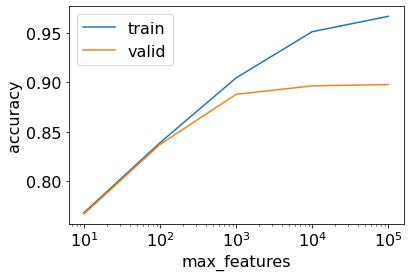

In [36]:
train_scores = []
cv_scores = []

max_features = [10, 100, 1000, 10_000, 100_000]

for mf in max_features:
    #     print(mf)
    pipe = make_pipeline(
        CountVectorizer(stop_words="english", max_features=mf),
        LogisticRegression(max_iter=1000),
    )
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)
    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(max_features, train_scores, label="train")
plt.semilogx(max_features, cv_scores, label="valid")
plt.legend()
plt.xlabel("max_features")
plt.ylabel("accuracy");

In [37]:
pd.DataFrame({"max_features": max_features, "train": train_scores, "cv": cv_scores})

,max_features,train,cv
0,10,0.767854,0.766593
1,100,0.838900,0.837147
2,1000,0.904626,0.887956
3,10000,0.951498,0.896537
4,100000,0.967045,0.897890


<br><br>

#### 3(b)
rubric={points:4}

The following code varies the `C` hyperparameter of `LogisticRegression` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `C`. Based on the plot, what value of `C` seems best?

Note: the code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

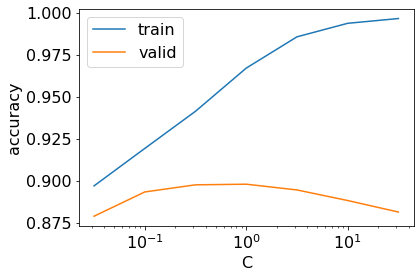

In [38]:
train_scores = []
cv_scores = []

C_vals = 10.0 ** np.arange(-1.5, 2, 0.5)

for C in C_vals:
    #     print(C)
    pipe = make_pipeline(
        CountVectorizer(stop_words="english", max_features=None),
        LogisticRegression(max_iter=1000, C=C),
    )
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)

    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(C_vals, train_scores, label="train")
plt.semilogx(C_vals, cv_scores, label="valid")
plt.legend()
plt.xlabel("C")
plt.ylabel("accuracy");

In [39]:
pd.DataFrame({"C": C_vals, "train": train_scores, "cv": cv_scores})

,C,train,cv
0,0.031623,0.896898,0.878821
1,0.100000,0.919196,0.893277
2,0.316228,0.941333,0.897521
3,1.000000,0.967045,0.897890
4,3.162278,0.985675,0.894476
5,10.000000,0.993733,0.888171
6,31.622777,0.996571,0.881313


<br><br>

#### 3(c)
rubric={points:12}

- Using `GridSearchCV`, jointly optimize `max_features` and `C` across all the combinations of values we tried above. 
  - Note: the code might be a bit slow here. 
  - Setting `n_jobs=-1` should speed it up if you have a multi-core processor.
  - You can reduce the number of folds (e.g. `cv=2`) to speed it up if necessary.
- What are the best values of `max_features` and `C` according to your grid search?
- Do these best values agree with what you found in parts (a) and (b)?
- Generally speaking, _should_ these values agree with what you found in parts (a) and (b)? Explain.

In [40]:
param_grid = {
    'logisticregression__C':10.0 ** np.arange(-3, 3, 1),
    'countvectorizer__max_features' : [20000,30000,40000]
    
}

In [41]:
pipe = make_pipeline(
    CountVectorizer(stop_words='english'),
    LogisticRegression(max_iter=1000)
    
)

grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, return_train_score=True)

In [42]:
from sklearn import set_config


set_config(display="diagram")

In [43]:
grid_search.fit(X_train, y_train) # all the work is done here
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': [20000, 30000, 40000],
                         'logisticregression__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             return_train_score=True)

In [44]:
grid_search.best_score_

0.8978900824847041

In [45]:
best_parameters = grid_search.best_params_
best_parameters

{'countvectorizer__max_features': 40000, 'logisticregression__C': 1.0}

<br><br>

#### 3(d)
rubric={points:5}

- Evaluate your final model on the test set. 
- How does your test accuracy compare to your validation accuracy? 
- If they are different: do you think this is because you "overfitted on the validation set", or simply random luck?

In [46]:
best_parameters["logisticregression__C"]

1.0

In [47]:
final_pipe = make_pipeline(
        CountVectorizer(stop_words="english",max_features=best_parameters['countvectorizer__max_features']),
    LogisticRegression(max_iter=1000,C=best_parameters["logisticregression__C"])
)

In [48]:
final_pipe.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=40000, stop_words='english')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [49]:
final_pipe.score(X_train,y_train)

0.9632466014639848

In [50]:
final_pipe.score(X_test,y_test)

0.8990588669496217

<br><br><br><br>

## Exercise 4: Very short answer questions
rubric={points:10}

Each question is worth 2 points. Max 2 sentences per answer.

1. What is the problem with calling `fit_transform` on your test data with `CountVectorizer`? 
- Ans: we are no break a goldan rule. so we do not `fit_transform` no calling in test data.
2. Why is it important to follow the Golden Rule? If you violate it, will that give you a worse classifier?
- Ans: the Golden Rule ensures fairness in the treatment of data and helps to prevent bias in machine learning models. Violating     it can lead to a worse classifier as the model may memorize specific patterns instead of learning generalizable ones,           resulting in poor performance on new data.
3. If you could only access one of `predict` or `predict_proba`, which one would you choose? Briefly explain.
- Ans:I would choose `predict_proba` because it provides the probability estimates for each class and can be thresholded to obtain predicted labels.
- `predict` only gives the predicted label without any indication of the model's confidence.
4. What are two advantages of using sklearn `Pipeline`s? 
- Ans:
-     1)Pipelines simplify the machine learning workflow by encapsulating multiple steps into a single object, reducing the amount      of code needed and making it easier to reproduce results.
-     2)Pipelines can help to optimize the performance of your model by allowing you to automatically tune hyperparameters and perform feature selection. This can help to reduce overfitting and improve the accuracy of your model.
-     3)easy to understand the chain of process using pipeline also makin easy for anyone.
5. What are two advantages of `RandomizedSearchCV` over `GridSearchCV`?
- Ans:
- 1)faster then GridSearchCV `(RandomizedSearchCV choose some randomly sets of paramertes)`.This can result in significant time savings, especially when the hyperparameter space is large.

-  2)RandomizedSearchCV can be used with any estimator that implements a score method, whereas GridSearchCV is limited to estimators that implement a predict method.


<br><br><br><br>